## Data Science Technical Assessment

In [1]:
#Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset

best_df = pd.read_csv('Downloads/Amazon_bestsellers.csv')

In [3]:
best_df.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
385,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,7747,14,2011,Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
203,Kitchen Confidential Updated Edition: Adventur...,Anthony Bourdain,4.8,2507,8,2018,Non Fiction
197,Killing Kennedy: The End of Camelot,Bill O'Reilly,4.6,8634,25,2012,Non Fiction
426,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,22641,11,2019,Non Fiction


In [4]:
#General info about the dataset

best_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


#### The dataset contains 550 rows with 7 columns
#### There are no missing values

In [5]:
#Stastistical summary

best_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
#checking for unique values in Genre
best_df['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

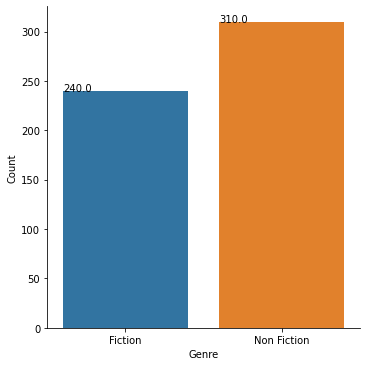

In [7]:
#Data Visualization of Fiction to Non-Fiction

genre_count= best_df.groupby('Genre')['Name'].count()
genre_df= genre_count.rename('Count').reset_index()
genre_df
g = sns.catplot(x='Genre',y='Count',kind='bar', data=genre_df)

for p in g.ax.patches:
    t = str(p.get_height())
    t_x = p.get_x()
    t_y = p.get_height()
    g.ax.text(t_x,t_y,t)

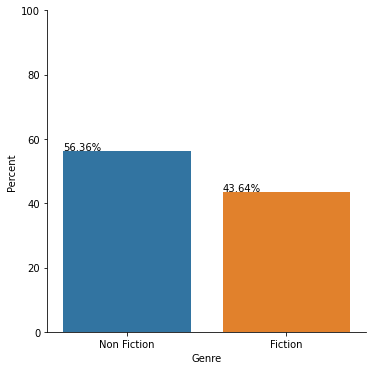

In [8]:
genre_df= best_df['Genre'].value_counts(normalize=True)
genre_df= genre_df.mul(100)
genre_df= genre_df.rename('Percent').reset_index()
genre_df= genre_df.rename(columns={'index':'Genre'})
genre_df
g = sns.catplot(x='Genre',y='Percent',kind='bar',data=genre_df)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    t = str(p.get_height().round(2)) + '%'
    t_x = p.get_x()
    t_y = p.get_height()
    g.ax.text(t_x,t_y,t)

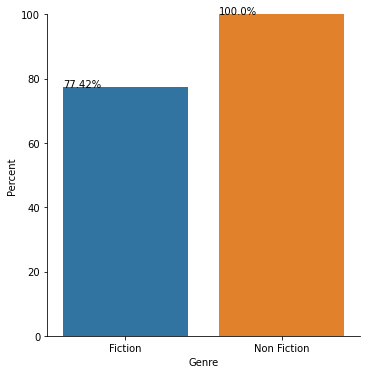

In [10]:
genre_count= best_df.groupby('Genre')['Name'].count()
genre_df= genre_count.rename('Count').reset_index()
genre_df[['Percent']]= round(genre_df[['Count']].div(310).mul(100),2)
genre_df
g = sns.catplot(x='Genre',y='Percent',kind='bar',data=genre_df)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    t = str(p.get_height()) + '%'
    t_x = p.get_x()
    t_y = p.get_height()
    g.ax.text(t_x,t_y,t)

In [16]:
#Data Visualization of Top 10 Authors according to Review

best_df[['Author','Name','Reviews']].groupby('Author').max().sort_values(by='Reviews',ascending=False).head(10)

,Name,Reviews
Author,,
Delia Owens,Where the Crawdads Sing,87841
Paula Hawkins,The Girl on the Train,79446
Michelle Obama,Becoming,61133
Gillian Flynn,Gone Girl,57271
John Green,The Fault in Our Stars,50482
Kristin Hannah,The Nightingale: A Novel,49288
E L James,Grey: Fifty Shades of Grey as Told by Christia...,47265
Andy Weir,The Martian,39459
Anthony Doerr,All the Light We Cannot See,36348


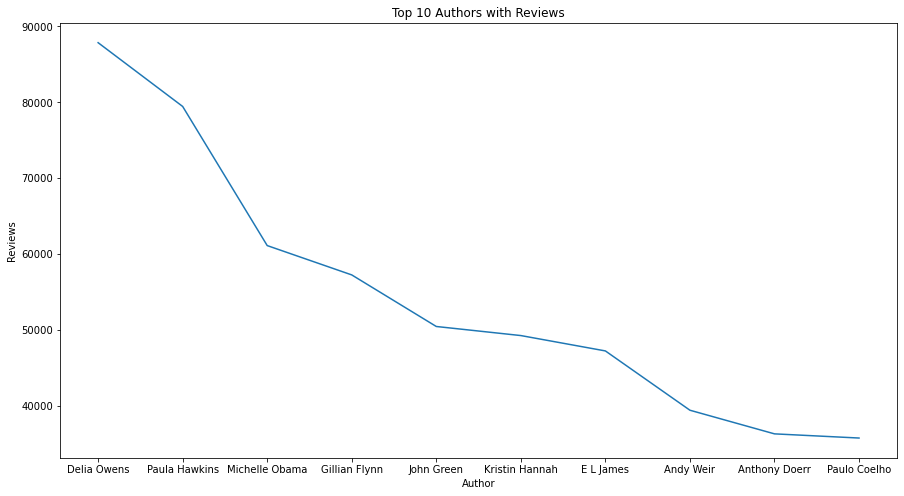

In [17]:
author_df = best_df[['Author','Reviews']].groupby('Author').max().sort_values(by='Reviews',ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.title('Top 10 Authors with Reviews')
sns.lineplot(x='Author',y='Reviews',data=author_df)
plt.show()

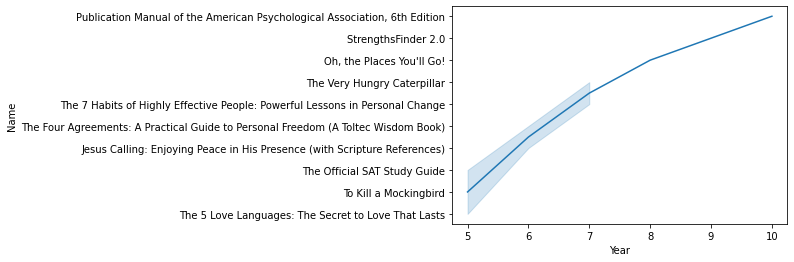

In [18]:
#Data Visualization of Best Selling Books of the Decade
#Top 10 Books that sold out most through the years

top_books= best_df[['Name','Year']].groupby('Name').count().sort_values(by='Year',ascending=False).head(10)
sns.lineplot(x='Year',y='Name', data=top_books)
plt.show()

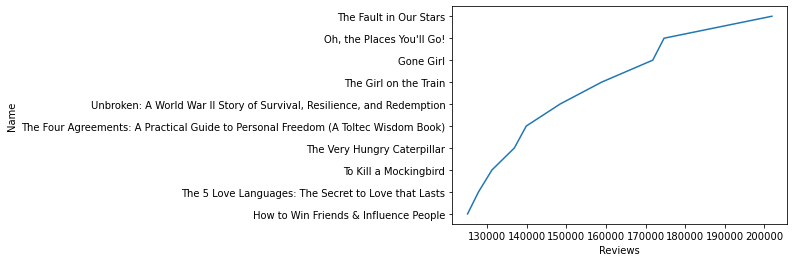

In [19]:
#Data Visualization of Best Selling Books of the Decade
#Top 10 books with the highest reviews through the years

top_book= best_df[['Name','Reviews']].groupby('Name').sum().sort_values(by='Reviews',ascending=False).head(10)
sns.lineplot(x='Reviews',y='Name', data=top_book)
plt.show()

<AxesSubplot:>

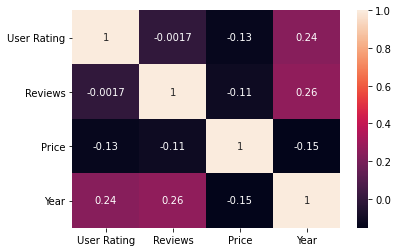

In [20]:
sns.heatmap(best_df.corr(), annot=True)

## CONCLUSION

1. The dataset was about Amazon bestselling books
2. There were no missing values
3. We were about to visualize
    a. Proportion of Fiction to Non-Fiction Genre
    b. Best Selling Books through the years
    c. Top 10 Authors according to reviews
    d. Trend over the years